In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# 1. Dados
angles = np.random.uniform(-np.pi, np.pi, (1000,1))
sines  = np.sin(angles)

# 2. Modelo mais profundo
model = keras.Sequential([
    layers.Dense(50, activation='tanh', input_shape=(1,)),  # primeira camada oculta
    layers.Dense(50, activation='tanh'),                    # segunda camada oculta
    layers.Dense(1)                                         # saída linear
])

# 3. Compilação (com learning rate menor para maior estabilidade)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# 4. Callback de early stopping para interromper quando não melhorar
early_stop = callbacks.EarlyStopping(
    monitor='loss',    # pode usar 'val_loss' se tiver validação
    patience=30,
    restore_best_weights=True
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


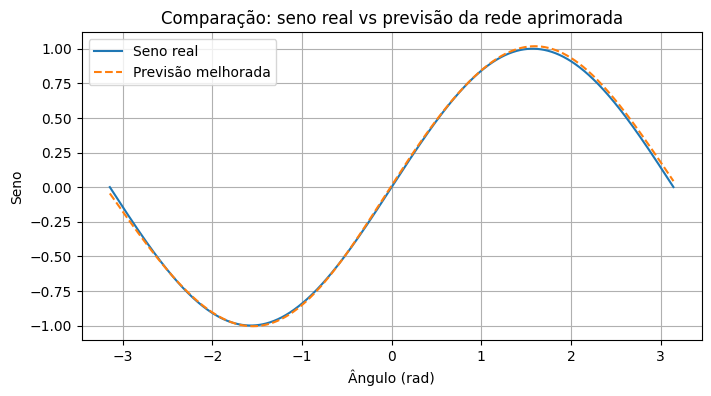

In [ ]:
# 5. Treinamento
history = model.fit(
    angles, sines,
    epochs=600,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)

# 6. Avaliação visual
x_vals = np.linspace(-np.pi, np.pi, 1000).reshape(-1,1)
y_true = np.sin(x_vals)
y_pred = model.predict(x_vals)

plt.figure(figsize=(8,4))
plt.plot(x_vals, y_true, label='Seno real')
plt.plot(x_vals, y_pred, '--', label='Previsão melhorada')
plt.legend()
plt.title("Comparação: seno real vs previsão da rede aprimorada")
plt.xlabel("Ângulo (rad)")
plt.ylabel("Seno")
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf

# Converte sem quantização
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# garante que NÃO haja otimizações
converter.optimizations = []
tflite_model = converter.convert()

# Grava no disco
with open('modelo_seno_float32.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpfnga1rwz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137629077899984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137629077897872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137629077902480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137629077897488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137629077902288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137629077900176: TensorSpec(shape=(), dtype=tf.resource, name=None)


# teste

In [ ]:
import numpy as np

# valor que você quer prever
x = np.array([[np.pi/6]])   # shape = (1,1)

# faz a predição
y_pred = model.predict(x)

print(f"Previsão para π/6 ≈ {y_pred[0,0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Previsão para π/6 ≈ 0.5053855776786804


In [ ]:
model.predict(np.array([[np.pi/6]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.50018877]], dtype=float32)

In [ ]:
model.predict(np.array([[np.pi/2]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.0068923]], dtype=float32)

In [ ]:
model.predict(np.array([[np.pi]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.00518787]], dtype=float32)

# modelo cosseno

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# 1. Dados
angles = np.random.uniform(-np.pi, np.pi, (1000,1))
cossenos  = np.cos(angles)

# 2. Modelo mais profundo
model = keras.Sequential([
    layers.Dense(50, activation='tanh', input_shape=(1,)),  # primeira camada oculta
    layers.Dense(50, activation='tanh'),                    # segunda camada oculta
    layers.Dense(1)                                         # saída linear
])

# 3. Compilação (com learning rate menor para maior estabilidade)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# 4. Callback de early stopping para interromper quando não melhorar
early_stop = callbacks.EarlyStopping(
    monitor='loss',    # pode usar 'val_loss' se tiver validação
    patience=20,       # espera até 20 épocas sem melhora
    restore_best_weights=True
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


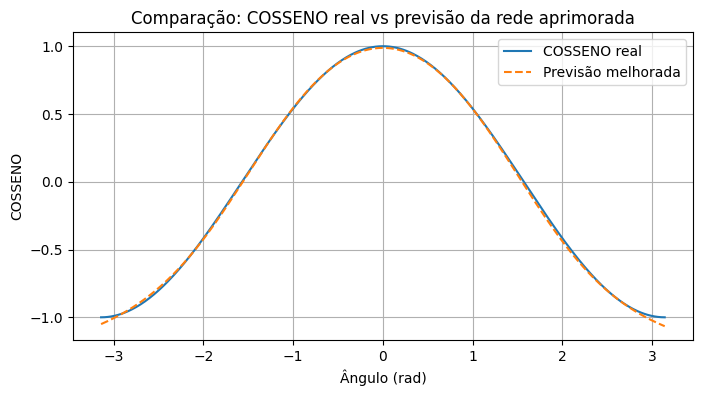

In [ ]:
# 5. Treinamento
history = model.fit(
    angles, cossenos,
    epochs=500,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)

# 6. Avaliação visual
x_vals = np.linspace(-np.pi, np.pi, 500).reshape(-1,1)
y_true = np.cos(x_vals)
y_pred = model.predict(x_vals)

plt.figure(figsize=(8,4))
plt.plot(x_vals, y_true, label='COSSENO real')
plt.plot(x_vals, y_pred, '--', label='Previsão melhorada')
plt.legend()
plt.title("Comparação: COSSENO real vs previsão da rede aprimorada")
plt.xlabel("Ângulo (rad)")
plt.ylabel("COSSENO")
plt.grid(True)
plt.show()

In [ ]:
model.predict(np.array([[np.pi]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


array([[-1.0658001]], dtype=float32)

In [ ]:
model.predict(np.array([[np.pi/2]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[-0.0205396]], dtype=float32)

In [ ]:
model.predict(np.array([[np.pi/3]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.49726284]], dtype=float32)

In [ ]:
# Salvar no ambiente do Colab
tflite_model_path = 'modelo_COSSENO.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(converted)

# Para fazer o download automático no Colab
from google.colab import files
files.download(tflite_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>